# Decision Tree

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [59]:
x,y = make_classification(n_samples=1000, n_redundant=1,
                          n_features=3,n_informative=2, n_classes=2)

In [6]:
x

array([[ 0.39863673, -0.78276229,  1.16894701],
       [-1.1247422 , -1.34970068, -0.30094591],
       [ 1.74318815,  1.14032343,  1.26791234],
       ...,
       [-0.03564242, -0.69669454,  0.54128071],
       [-1.76465203, -1.07094287, -1.35379223],
       [ 0.58591769, -1.70023635,  2.18117473]])

In [7]:
y

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,

In [60]:
df = pd.DataFrame(x ,columns=['col1','col2','col3'])

In [62]:
df = df.iloc[:,0:2]

In [63]:
df['target'] = y

In [64]:
df.head()

,col1,col2,target
0,-0.926207,-1.499583,1
1,1.530657,0.990509,1
2,0.801793,0.474932,1
3,-0.031080,0.714188,1
4,1.829216,1.083009,1


In [55]:
df = df.iloc[:,0:3]

In [66]:
x_train, x_test,y_train,y_test = train_test_split(df.iloc[:,:2],df['target'],test_size=0.2, random_state=42)
x_train.shape

(800, 2)

In [34]:
d_tree = DecisionTreeClassifier(
    random_state = 42
)

In [35]:
d_tree.fit(x_train,y_train)
y_pred1 = d_tree.predict(x_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred1))

Accuracy Score :  0.925


In [45]:
import matplotlib.pyplot as plt

[Text(0.5394736842105263, 0.9166666666666666, 'x[2] <= -0.135\ngini = 0.5\nsamples = 800\nvalue = [407, 393]'),
 Text(0.2894736842105263, 0.75, 'x[2] <= -0.65\ngini = 0.165\nsamples = 419\nvalue = [381, 38]'),
 Text(0.4144736842105263, 0.8333333333333333, 'True  '),
 Text(0.10526315789473684, 0.5833333333333334, 'x[2] <= -1.035\ngini = 0.061\nsamples = 318\nvalue = [308, 10]'),
 Text(0.05263157894736842, 0.4166666666666667, 'gini = 0.0\nsamples = 185\nvalue = [185, 0]'),
 Text(0.15789473684210525, 0.4166666666666667, 'x[2] <= -1.034\ngini = 0.139\nsamples = 133\nvalue = [123, 10]'),
 Text(0.10526315789473684, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.21052631578947367, 0.25, 'x[1] <= 0.449\ngini = 0.127\nsamples = 132\nvalue = [123, 9]'),
 Text(0.15789473684210525, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.2631578947368421, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.47368421052631576, 0.5833333333333334, 'x[1] <= -0.444\ngini = 0.401\nsamples = 101\nvalue = [73

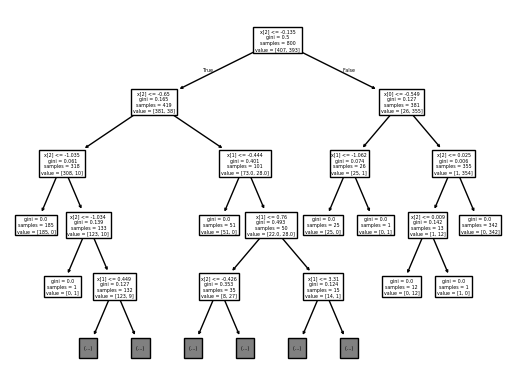

In [36]:
plot_tree(d_tree,max_depth=4)


In [29]:
d_tree = DecisionTreeClassifier(random_state = 42)

model = cross_val_score(estimator=d_tree, X=x_train, y=y_train ,cv=5, scoring='accuracy',verbose=1)
model.mean()

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


np.float64(0.9625)

In [38]:
from sklearn.tree import export_text

r = export_text(d_tree, feature_names=['col1','col2','col3'])
print(r)

|--- col3 <= -0.13
|   |--- col3 <= -0.65
|   |   |--- col3 <= -1.03
|   |   |   |--- class: 0
|   |   |--- col3 >  -1.03
|   |   |   |--- col3 <= -1.03
|   |   |   |   |--- class: 1
|   |   |   |--- col3 >  -1.03
|   |   |   |   |--- col2 <= 0.45
|   |   |   |   |   |--- col1 <= -0.56
|   |   |   |   |   |   |--- col2 <= -0.29
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- col2 >  -0.29
|   |   |   |   |   |   |   |--- col1 <= -0.77
|   |   |   |   |   |   |   |   |--- col1 <= -0.88
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- col1 >  -0.88
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- col1 >  -0.77
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- col1 >  -0.56
|   |   |   |   |   |   |--- col3 <= -0.69
|   |   |   |   |   |   |   |--- col3 <= -0.88
|   |   |   |   |   |   |   |   |--- col1 <= -0.48
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |

# Random Forest

In [41]:
rf = RandomForestClassifier(
    n_estimators=25, criterion='gini'
)

rf.fit(x_train, y_train)
y_pred2 = rf.predict(x_test)
print('accuracy score : ',accuracy_score(y_test,y_pred2))

accuracy score :  0.935


In [70]:
x_train

,col1,col2
29,-0.756575,-0.325477
535,1.711320,1.415971
695,0.111606,-0.290188
557,-0.706020,-1.436870
836,1.113374,0.526608
...,...,...
106,1.760206,1.252763
270,1.859695,1.019432
860,-2.500764,-1.534422
435,1.643418,1.109150


In [ ]:
rf = DecisionTreeClassifier()
rf.fit(x_train, y_train)  # ✅ Fit the model

x_range = np.linspace(x_train.min(), x_train.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)

plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(x_train["col1"], x_train["col2"], c=y_train, edgecolors='k')
plt.show()

In [ ]:

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()